In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [113]:
M=pd.read_excel('C:/Users/farou/Pictures/Screenshots/STAT/M.xlsx')
M.head()

,Genre,age,A_E,MT_item1,MT_item2,MT_item3,For_item1,ITEM1,ITEM2,ITEM3,ITEM4
0,Homme,20,CI1,d'accord,A tout à fait d'accord,pas d'accord,Option réfléchir,d'accord,A tout à fait d'accord,A tout à fait d'accord,pas d'accord
1,Homme,20,CI1,d'accord,d'accord,pas d'accord,une bonne option,A tout à fait d'accord,A tout à fait d'accord,Sans Opinion,pas du tout d'accord
2,Femme,25 ans,CI2,A tout à fait d'accord,d'accord,pas d'accord,Option réfléchir,d'accord,d'accord,A tout à fait d'accord,pas d'accord
3,Femme,20,CI1,A tout à fait d'accord,pas d'accord,pas du tout d'accord,une bonne option,pas du tout d'accord,pas d'accord,pas du tout d'accord,pas du tout d'accord
4,Homme,20,CI1,pas du tout d'accord,pas d'accord,pas d'accord,une bonne option,pas d'accord,pas d'accord,Sans Opinion,Sans Opinion


In [114]:
M.columns
P=M[['For_item1','ITEM1']]


In [228]:
P=M[['ITEM1','MT_item2','For_item1']]

#P['Genre '].replace(["Homme","Femme"],[1,0],inplace=True)
#P['A_E'].replace(['CI1','CI2'],[1,2],inplace=True)
P['ITEM1'].replace(["A tout à fait d'accord","d'accord","Sans Opinion","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)


P['MT_item2'].replace(["A tout à fait d'accord","d'accord","neutre","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)
#P['MT_item2'].replace(["tout à fait d'accord","d'accord","neutre","pas d'accord","pas du tout d'accord"],[1,2,3,4,5],inplace=True)

P['For_item1'].replace(["Option réfléchir","une bonne option","pas d'avis clair sur ce sujet","une option à éviter"],[1,2,3,4],inplace=True)
P.head()

C:\Users\farou\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ITEM1,MT_item2,For_item1
0,2,1,1
1,1,2,2
2,2,2,1
3,5,4,2
4,4,4,2


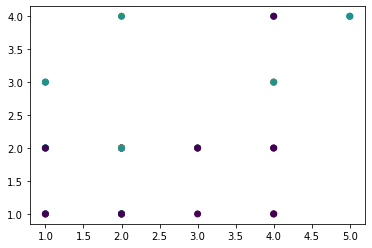

In [116]:
Y=P['For_item1']
X=P.drop('For_item1',axis=1)
X1=X.iloc[:,1]
X2=X.iloc[:,0]
plt.scatter(X2,X1,c=Y)


In [215]:
from sklearn.model_selection import train_test_split


In [216]:
X_train, X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)
print('Train set :', X_train.shape)
print('Test set :', X_test.shape)


Train set : (34, 2)
Test set : (9, 2)


In [217]:
from sklearn.svm import SVC

In [234]:
model = SVC(kernel='linear',C=5,gamma=0.001)
model.fit(X_train,Y_train)
print('test score :',model.score(X_test,Y_test))

test score : 0.7777777777777778


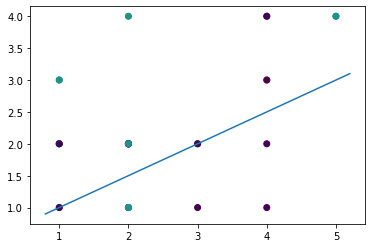

In [231]:
X1=X_train.iloc[:,0]
X2=X_train.iloc[:,1]
Z1=X_test.iloc[:,0]
Z2=X_test.iloc[:,1]

plt.scatter(X1,X2,c=Y_train)
ax=plt.gca()
xlim=ax.get_xlim()

#ax.scatter(Z1,Z2,c=Y_test,marker= 's')
w=model.coef_[0]
a=-w[0] / w[1]
xx=np.linspace(xlim[1],xlim[0])
yy=a*xx - (model.intercept_[0]/w[1])
plt.plot(xx,yy) 
  

In [220]:
from sklearn.metrics import confusion_matrix

In [221]:
confusion_matrix(Y_test,model.predict(X_test))

array([[5, 1, 0],
       [0, 2, 0],
       [0, 1, 0]], dtype=int64)

In [222]:
def MODSVC(model,ITEM1=2,MT_item2=3):
    x=np.array([ITEM1,MT_item2]).reshape(1,2)
    print(model.predict(x))

In [223]:
MODSVC(model)

[2]


In [224]:
y_pred = model.predict(X_test)

In [226]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.50      0.61      0.53         9
weighted avg       0.78      0.78      0.75         9



C:\Users\farou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\farou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\farou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
